In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [35]:
## Load the weather data 
weather_data = pd.read_excel("860_A1_Q1_Upload.xlsx")
## a. New variable for 'Air density'
weather_data['Air_density kg/m3'] = (weather_data['Stn Press (kPa)'] * 1000) / 287.05 * (weather_data['Temp (°C)'] + 273.15)
weather_data.head(5)

,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),...,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Air_density kg/m3
0,1,1,00:00:00,4.3,NaN,4.0,NaN,98,NaN,8.0,...,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog",95196.134820
1,1,1,01:00:00,5.1,NaN,5.0,NaN,99,NaN,NaN,...,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN,95451.236718
2,1,1,02:00:00,5.9,NaN,5.6,NaN,98,NaN,31.0,...,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog",95822.882773
3,1,1,03:00:00,3.3,NaN,2.6,NaN,95,NaN,30.0,...,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN,95324.929455
4,1,1,04:00:00,2.8,NaN,1.2,NaN,89,NaN,30.0,...,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN,95450.533008


In [36]:
## b. New variable for b.	Windspeed [Wind Spd (km/h)]
weather_data['Wind Spd (m/s)'] = weather_data['Wind Spd (km/h)'] * 0.277778
weather_data.head(5)

,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),...,Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Air_density kg/m3,Wind Spd (m/s)
0,1,1,00:00:00,4.3,NaN,4.0,NaN,98,NaN,8.0,...,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog",95196.134820,3.055558
1,1,1,01:00:00,5.1,NaN,5.0,NaN,99,NaN,NaN,...,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN,95451.236718,1.111112
2,1,1,02:00:00,5.9,NaN,5.6,NaN,98,NaN,31.0,...,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog",95822.882773,7.777784
3,1,1,03:00:00,3.3,NaN,2.6,NaN,95,NaN,30.0,...,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN,95324.929455,9.444452
4,1,1,04:00:00,2.8,NaN,1.2,NaN,89,NaN,30.0,...,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN,95450.533008,7.777784


In [44]:
## c. Calculate power of turbine
turbine_swept_area = 13273.23 ## in m^2
Max_power_coef = 0.35
Max_Cut_off = 32
Min_Cut_off = 4
Nominal_power =4e6
weather_data['Power(watts)']= weather_data['Air_density kg/m3']*0.5*(weather_data['Wind Spd (m/s)']**3)\
*turbine_swept_area*Max_power_coef 
weather_data.loc[(weather_data['Wind Spd (m/s)'] < Min_Cut_off) | (weather_data['Wind Spd (m/s)'] > Max_Cut_off), 'Power(watts)'] = 0
weather_data.loc[(weather_data['Power(watts)'] > Nominal_power) , 'Power(watts)'] = Nominal_power
weather_data.head(5)

,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),...,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Air_density kg/m3,Wind Spd (m/s),Power(watts)
0,1,1,00:00:00,4.3,NaN,4.0,NaN,98,NaN,8.0,...,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog",95196.134820,3.055558,0.0
1,1,1,01:00:00,5.1,NaN,5.0,NaN,99,NaN,NaN,...,98.47,NaN,NaN,NaN,NaN,NaN,NaN,95451.236718,1.111112,0.0
2,1,1,02:00:00,5.9,NaN,5.6,NaN,98,NaN,31.0,...,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog",95822.882773,7.777784,4000000.0
3,1,1,03:00:00,3.3,NaN,2.6,NaN,95,NaN,30.0,...,98.98,NaN,NaN,NaN,NaN,NaN,NaN,95324.929455,9.444452,4000000.0
4,1,1,04:00:00,2.8,NaN,1.2,NaN,89,NaN,30.0,...,99.29,NaN,NaN,NaN,NaN,NaN,NaN,95450.533008,7.777784,4000000.0


In [47]:
## d. Total number of electricity produced in January 
## Total electricty = sum of all power produced converted to megawatts
Total_electricity = 49*(weather_data['Power(watts)'].sum() / 1e6)
print(f'Total electricty produced for the month of January is {Total_electricity:.2f}')

Total electricty produced for the month of January is 107408.00


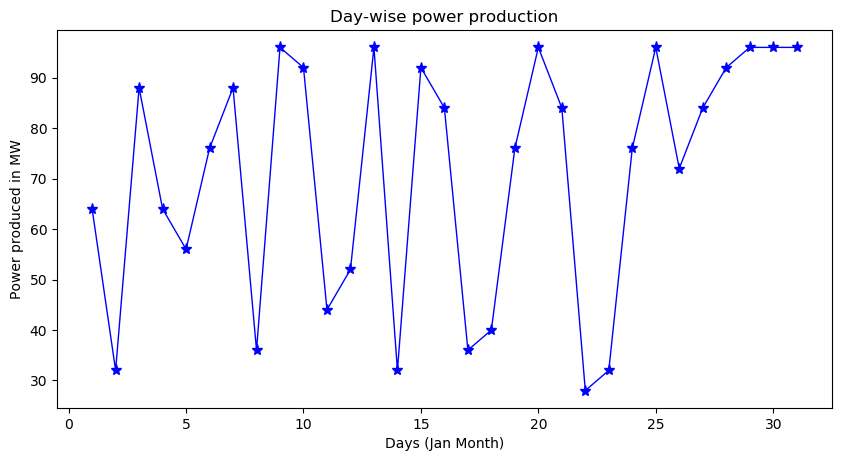

In [48]:
## e. Visuaisation to show power produced per day at farm
## Group by the days of month and sum up the powers and save in new variable
power_perday = weather_data.groupby('Day')['Power(watts)'].sum()
## For the simplicity of graph convert the power units to Mega watts
MWPower_perday = (power_perday/1e6).to_frame()
MWPower_perday
## Create Line graph to show the day-wise production of power
mp.figure(figsize=(10,5), dpi=100)
mp.title('Day-wise power production')
mp.xlabel('Days (Jan Month)')
mp.ylabel('Power produced in MW')
#mp.plot(MWPower_perday['Day'],MWPower_perday['Power(watts)'] , 'r*-', label='wow' , ms='10', lw='1', )
mp.plot(MWPower_perday, 'b*-', ms='8', lw='1')
mp.show()